In [10]:
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 

In [11]:
t1 = tf.constant([
 [1,2,3],
 [4,5,6],
 [7,8,9],
],dtype=tf.float32)
ds1 = tf.data.Dataset.from_tensors(t1)
ds2 = tf.data.Dataset.from_tensor_slices(t1)

In [12]:
for element in ds1:
    print(element)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


In [13]:
for element in ds2:
    print(element)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)
tf.Tensor([7. 8. 9.], shape=(3,), dtype=float32)


In [14]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255
type(images),type(labels)

(numpy.ndarray, numpy.ndarray)

In [15]:
dataset = tf.data.Dataset.from_tensor_slices((images,labels))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>

In [23]:
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'


file_names =  ['cowper.txt', 'derby.txt', 'butler.txt']
 
file_paths = [
    tf.keras.utils.get_file(file_name, directory_url + file_name)  
    for file_name in file_names
]


815980/815980 ━━━━━━━━━━━━━━━━━━━━ 4s 4us/step
809730/809730 ━━━━━━━━━━━━━━━━━━━━ 2s 3us/step
807992/807992 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [24]:
 text_line_dataset = tf.data.TextLineDataset(file_paths)

In [25]:
for line in text_line_dataset.take(5):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'


In [29]:
data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'

dataset_dir = tf.keras.utils.get_file(
    "stack_overflow_16k", 
    origin=data_url,
    untar=True
)


print(dataset_dir)
dataset_dir = pathlib.Path(dataset_dir).parent
train_dir = dataset_dir/'train'
train_dir


C:\Users\chand\.keras\datasets\stack_overflow_16k


WindowsPath('C:/Users/chand/.keras/datasets/train')

In [30]:
batch_size = 32
seed = 42
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
 train_dir,
 batch_size=batch_size,
 validation_split=0.2,
 subset='training',
 seed=seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [31]:
flowers_root = tf.keras.utils.get_file(
  'flower_photos',
  'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
  untar=True
)
flowers_root = pathlib.Path(flowers_root)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 220s 1us/step


In [32]:
for item in flowers_root.glob("*"):
    print(item)

C:\Users\chand\.keras\datasets\flower_photos\daisy
C:\Users\chand\.keras\datasets\flower_photos\dandelion
C:\Users\chand\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\chand\.keras\datasets\flower_photos\roses
C:\Users\chand\.keras\datasets\flower_photos\sunflowers
C:\Users\chand\.keras\datasets\flower_photos\tulips


In [33]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [34]:
def process_path(file_path):
    label = tf.strings.split(file_path,os.sep)[-2]
    return tf.io.read_file(file_path),label

In [35]:
labeled_ds = file_path_ds.map(process_path)

In [36]:
for image_raw, label in labeled_ds.take(1):
    print(image_raw,label,sep="\n")

tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x0cXICC_PROFILE\x00\x01\x01\x00\x00\x0cHLino\x02\x10\x00\x00mntrRGB XYZ \x07\xce\x00\x02\x00\t\x00\x06\x001\x00\x00acspMSFT\x00\x00\x00\x00IEC sRGB\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-HP  \x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11cprt\x00\x00\x01P\x00\x00\x003desc\x00\x00\x01\x84\x00\x00\x00lwtpt\x00\x00\x01\xf0\x00\x00\x00\x14bkpt\x00\x00\x02\x04\x00\x00\x00\x14rXYZ\x00\x00\x02\x18\x00\x00\x00\x14gXYZ\x00\x00\x02,\x00\x00\x00\x14bXYZ\x00\x00\x02@\x00\x00\x00\x14dmnd\x00\x00\x02T\x00\x00\x00pdmdd\x00\x00\x02\xc4\x00\x00\x00\x88vued\x00\x00\x03L\x00\x00\x00\x86view\x00\x00\x03\xd4\x00\x00\x00$lumi\x00\x00\x03\xf8\x00\x00\x00\x14meas\x00\x00\x04\x0c\x00\x00\x00$tech\x00\x00\x040\x00\x00\x00\x0crTRC

In [37]:
inc_dataset = tf.data.Dataset.range(100)
dec_dataset = tf.data.Dataset.range(0,-100,-1)
dataset = tf.data.Dataset.zip((inc_dataset,dec_dataset))
 
batched_dataset = dataset.batch(4)
for batch in batched_dataset.take(4):
    print([arr.numpy()for arr in batch])

[array([0, 1, 2, 3], dtype=int64), array([ 0, -1, -2, -3], dtype=int64)]
[array([4, 5, 6, 7], dtype=int64), array([-4, -5, -6, -7], dtype=int64)]
[array([ 8,  9, 10, 11], dtype=int64), array([ -8,  -9, -10, -11], dtype=int64)]
[array([12, 13, 14, 15], dtype=int64), array([-12, -13, -14, -15], dtype=int64)]


In [38]:
dataset.batch(4,drop_remainder = True)

<_BatchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(4,), dtype=tf.int64, name=None))>

In [39]:
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x,tf.int32)],x))
padded_batch_dataset = dataset.padded_batch(4,padded_shapes=(None,))
 
for batch in padded_batch_dataset.take(2):
    print(batch.numpy())
    print()

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]

[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]



In [40]:
file_path_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

In [41]:
def parse_image(filename):
    label = tf.strings.split(filename,os.sep)[-2]
    image = tf.io.read_file(filename)
    image = tf.io.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image,tf.float32)
    image = tf.image.resize(image,[128,128])
    return image, label

In [42]:
image_ds = file_path_ds.map(parse_image)

In [43]:
def show(image,label):
    plt.imshow(image)
    plt.title(label.numpy().decode("utf-8"))
    plt.axis("off")
    plt.show()

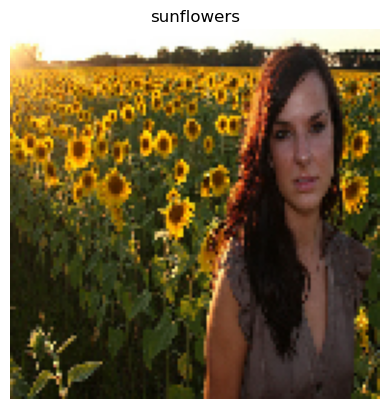

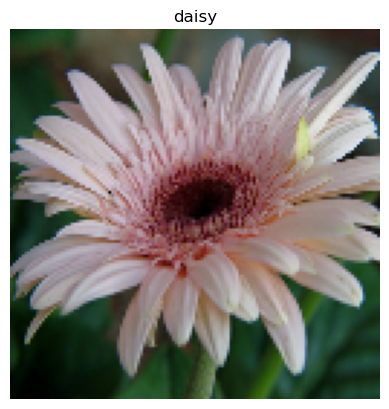

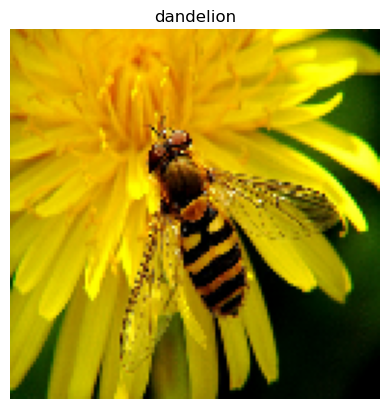

In [44]:
for image,label in image_ds.take(3):
    show(image,label)

In [45]:
train, test = tf.keras.datasets.fashion_mnist.load_data( )
images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

In [46]:
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((images,labels))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)
model = tf.keras.Sequential([
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

In [47]:
 model.fit(fmnist_train_ds, epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7384 - loss: 0.7821
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8370 - loss: 0.4726


In [48]:
loss,accuracy = model.evaluate(fmnist_train_ds)
print("Loss:",loss)
print("Accuracy:",accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8495 - loss: 0.4377
Loss: 0.43865492939949036
Accuracy: 0.8496833443641663


In [49]:
predict_ds = tf.data.Dataset.from_tensor_slices(images).batch(32)
result = model.predict(predict_ds,steps = 10)
print(result.shape)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
(320, 10)
